In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

def get_lisa_detection_ts_id(dataset, ts_name):
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name == ts_name:
            return ts.id
    return None

In [4]:
def lisa_pearson_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    return lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)

In [5]:
def lisa_dtw_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10, distance_function='euclidean'):
    return lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function=distance_function)

In [6]:
def lisa_geo_l(df, df_class, time_series_id, maximize_score='F1-Score'):
    return lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)

In [7]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [8]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [9]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [10]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [11]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Temp1 Single - Contamination Rate
dataset_names = [
    'Idaweb Swiss Temperature TS8',
    'Idaweb Swiss Temperature TS8 CL10',
    'Idaweb Swiss Temperature TS8 CL15',
    'Idaweb Swiss Temperature TS8 CL20',
    'Idaweb Swiss Temperature TS8 CL25'
]
dimensions = [50, 100, 150, 200, 250]
ts_name_lisa = 'REH'

In [13]:
# Contamination Rate - LISA PEARSON
# Results array [nmi, rmse, f1]
pearson_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_pearson_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    pearson_results.append(result)
    
lisa_pearson_results = np.array(pearson_results)

In [15]:
# Contamination Rate - LISA DTW
# Results array [nmi, rmse, f1]
dtw_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_dtw_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    dtw_results.append(result)
    
lisa_dtw_results = np.array(dtw_results)

In [16]:
# Contamination Rate - LISA GEO
# Results array [nmi, rmse, f1]
geo_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info = lisa_geo_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    geo_results.append(result)
    
lisa_spatial_results = np.array(geo_results)

In [17]:
# Contamination Rate - RPCA
# Results array [nmi, rmse, f1]
r_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)  

In [18]:
# Contamination Rate - HISTOGRAM
# Results array [nmi, rmse, f1]
h_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)

In [19]:
# Contamination Rate - CLUSTER
# Results array [nmi, rmse, f1]
c_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [20]:
# Contamination Rate - SVM
# Results array [nmi, rmse, f1]
s_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)  

In [21]:
# Contamination Rate - ISOLATION FOREST
# Results array [nmi, rmse, f1]
i_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [22]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [23]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': array([[0.726, 0.013, 0.851],
       [0.633, 0.03 , 0.848],
       [0.567, 0.05 , 0.819],
       [0.577, 0.06 , 0.844],
       [0.576, 0.073, 0.839]])}, {'title': 'LISA (DTW)', 'scores': array([[0.721, 0.012, 0.872],
       [0.66 , 0.027, 0.854],
       [0.592, 0.046, 0.84 ],
       [0.624, 0.05 , 0.869],
       [0.611, 0.062, 0.87 ]])}, {'title': 'LISA (Vanilla)', 'scores': array([[0.911, 0.003, 0.97 ],
       [0.813, 0.013, 0.932],
       [0.781, 0.021, 0.927],
       [0.809, 0.021, 0.946],
       [0.784, 0.028, 0.942]])}, {'title': 'RPCA', 'scores': array([[0.756, 0.011, 0.895],
       [0.787, 0.017, 0.907],
       [0.567, 0.058, 0.76 ],
       [0.588, 0.068, 0.795],
       [0.544, 0.092, 0.775]])}, {'title': 'Histogram', 'scores': array([[0.007, 0.801, 0.105],
       [0.02 , 0.753, 0.203],
       [0.005, 0.725, 0.271],
       [0.012, 0.68 , 0.351],
       [0.004, 0.661, 0.404]])}, {'title': 'Cluster', 'scores': array([[0.679, 0.017, 0.847],
  

In [3]:
import numpy as np
scores = [{'title': 'LISA (Pearson)', 'scores': np.array([[0.726, 0.013, 0.851],
       [0.633, 0.03 , 0.848],
       [0.567, 0.05 , 0.819],
       [0.577, 0.06 , 0.844],
       [0.576, 0.073, 0.839]])}, {'title': 'LISA (DTW)', 'scores': np.array([[0.721, 0.012, 0.872],
       [0.66 , 0.027, 0.854],
       [0.592, 0.046, 0.84 ],
       [0.624, 0.05 , 0.869],
       [0.611, 0.062, 0.87 ]])}, {'title': 'LISA (Vanilla)', 'scores': np.array([[0.911, 0.003, 0.97 ],
       [0.813, 0.013, 0.932],
       [0.781, 0.021, 0.927],
       [0.809, 0.021, 0.946],
       [0.784, 0.028, 0.942]])}, {'title': 'RPCA', 'scores': np.array([[0.756, 0.011, 0.895],
       [0.787, 0.017, 0.907],
       [0.567, 0.058, 0.76 ],
       [0.588, 0.068, 0.795],
       [0.544, 0.092, 0.775]])}, {'title': 'Histogram', 'scores': np.array([[0.007, 0.801, 0.105],
       [0.02 , 0.753, 0.203],
       [0.005, 0.725, 0.271],
       [0.012, 0.68 , 0.351],
       [0.004, 0.661, 0.404]])}, {'title': 'Cluster', 'scores': np.array([[0.679, 0.017, 0.847],
       [0.776, 0.017, 0.908],
       [0.644, 0.045, 0.824],
       [0.643, 0.056, 0.837],
       [0.629, 0.069, 0.84 ]])}, {'title': 'SVM', 'scores': np.array([[0.11 , 0.098, 0.338],
       [0.074, 0.125, 0.324],
       [0.071, 0.162, 0.341],
       [0.135, 0.172, 0.456],
       [0.09 , 0.222, 0.393]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.   , 0.155, 0.061],
       [0.017, 0.175, 0.215],
       [0.015, 0.215, 0.24 ],
       [0.028, 0.234, 0.299],
       [0.019, 0.277, 0.288]])}]


In [4]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [5]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [6]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

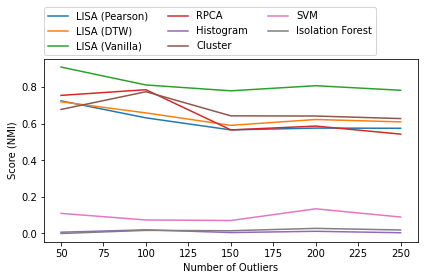

In [7]:
generate_nmi_line_chart(dimensions, scores)

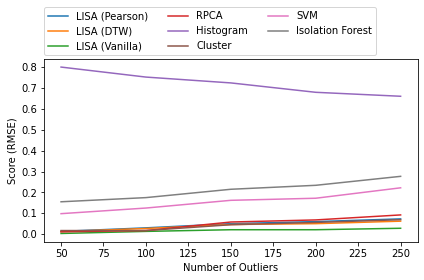

In [8]:
generate_rmse_line_chart(dimensions, scores)

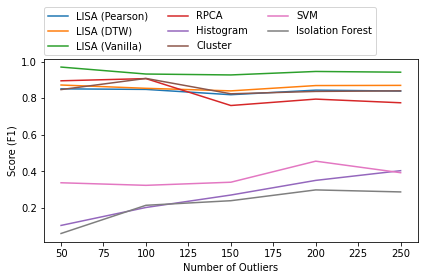

In [9]:
generate_f1_line_chart(dimensions, scores)